In [1]:
# change working directory
import os
os.chdir(os.path.expanduser("~/JupyterLab")) #Change to your working directory 
print(f"Current working directory: {os.path.abspath(os.curdir)}")

Current working directory: /home/valdipnet/JupyterLab


In [2]:
import coolbox
from coolbox.api import *

In [3]:
coolbox.__version__

'0.3.9'

In [4]:
# Set data_dir 
data_dir = os.path.expanduser("~/JupyterLab") #Change to your data/working directory

In [5]:
# Constant Values for Bigwig files HiChIPseq
bw1 = f"{data_dir}/BLF_HiChIP_HAL01_TCF3_merged_nodd_mapped_RPKM.bw"

In [6]:
# Constant Values for Bigwig files ChIPseq Histone public data
bw2 = f"{data_dir}/BLF_ChIP_HAL01_H3K27ac_merged_cle_sort_dd_RPKM.bw"
bw3 = f"{data_dir}/BLF_ChIP_HAL01_H3K4me1_merged_cle_sort_dd_RPKM.bw"
bw4 = f"{data_dir}/BLF_ChIP_HAL01_H3K4me3_merged_cle_sort_dd_RPKM.bw"
bw5 = f"{data_dir}/BLF_ChIP_HAL01_H3K27me3_merged_cle_sort_dd_RPKM.bw"

In [7]:
# Constant Values for Bigwig files RNAseq TCF3::HLF KO public data
bw6 = f"{data_dir}/sgSCR.5d.rep1.bw"
bw7 = f"{data_dir}/sgSCR.5d.rep2.bw"
bw8 = f"{data_dir}/sgHLF.5d.rep1.bw"
bw9 = f"{data_dir}/sgHLF.5d.rep2.bw"

In [8]:
# Constant Values for Bigwig files ChIPseq CTCF GM12878 public data
bwChipCTCF1 = f"{data_dir}/Ab validation replicates of CTCF ChIP-seq on GM12878 cells - Santa Cruz, sc-271514.bw"

In [9]:
# Constant Values for Bigwig HAL-01 ATACseq public data
bwATAC_HAL01 = f"{data_dir}/GSM5663910_05_HAL01_ATAC-Seq.hg38.bw"

In [10]:
#Constant Values for arcs
arcs1 = f"{data_dir}/FitHiChIP_5kb_d50kb_3Mb_q0.01.interactions_FitHiC_Q0.01_MergeNearContacts.bedpe" #Interaction FitHiChIP generated
arcsLoops = f"{data_dir}/MotifHLF_EPL.bedpe" # Enhancer-Promoter loops filterd for at least one enriched anchor with HLF motif and a regulated TCF3::HLF target gene

In [11]:
# Constant Values for Annotation files
gtf40v = f"{data_dir}/gencode.v40.annotation.gtf"
BEDTrack = f"{data_dir}/GRCh38.ncbiRefSeqSelect.bed"

In [12]:
#Constant Values for ContactMap
CMap = f"{data_dir}/JoinedRep_TCF3-HLF_hg38_nodd_matrix_1kb.mcool"

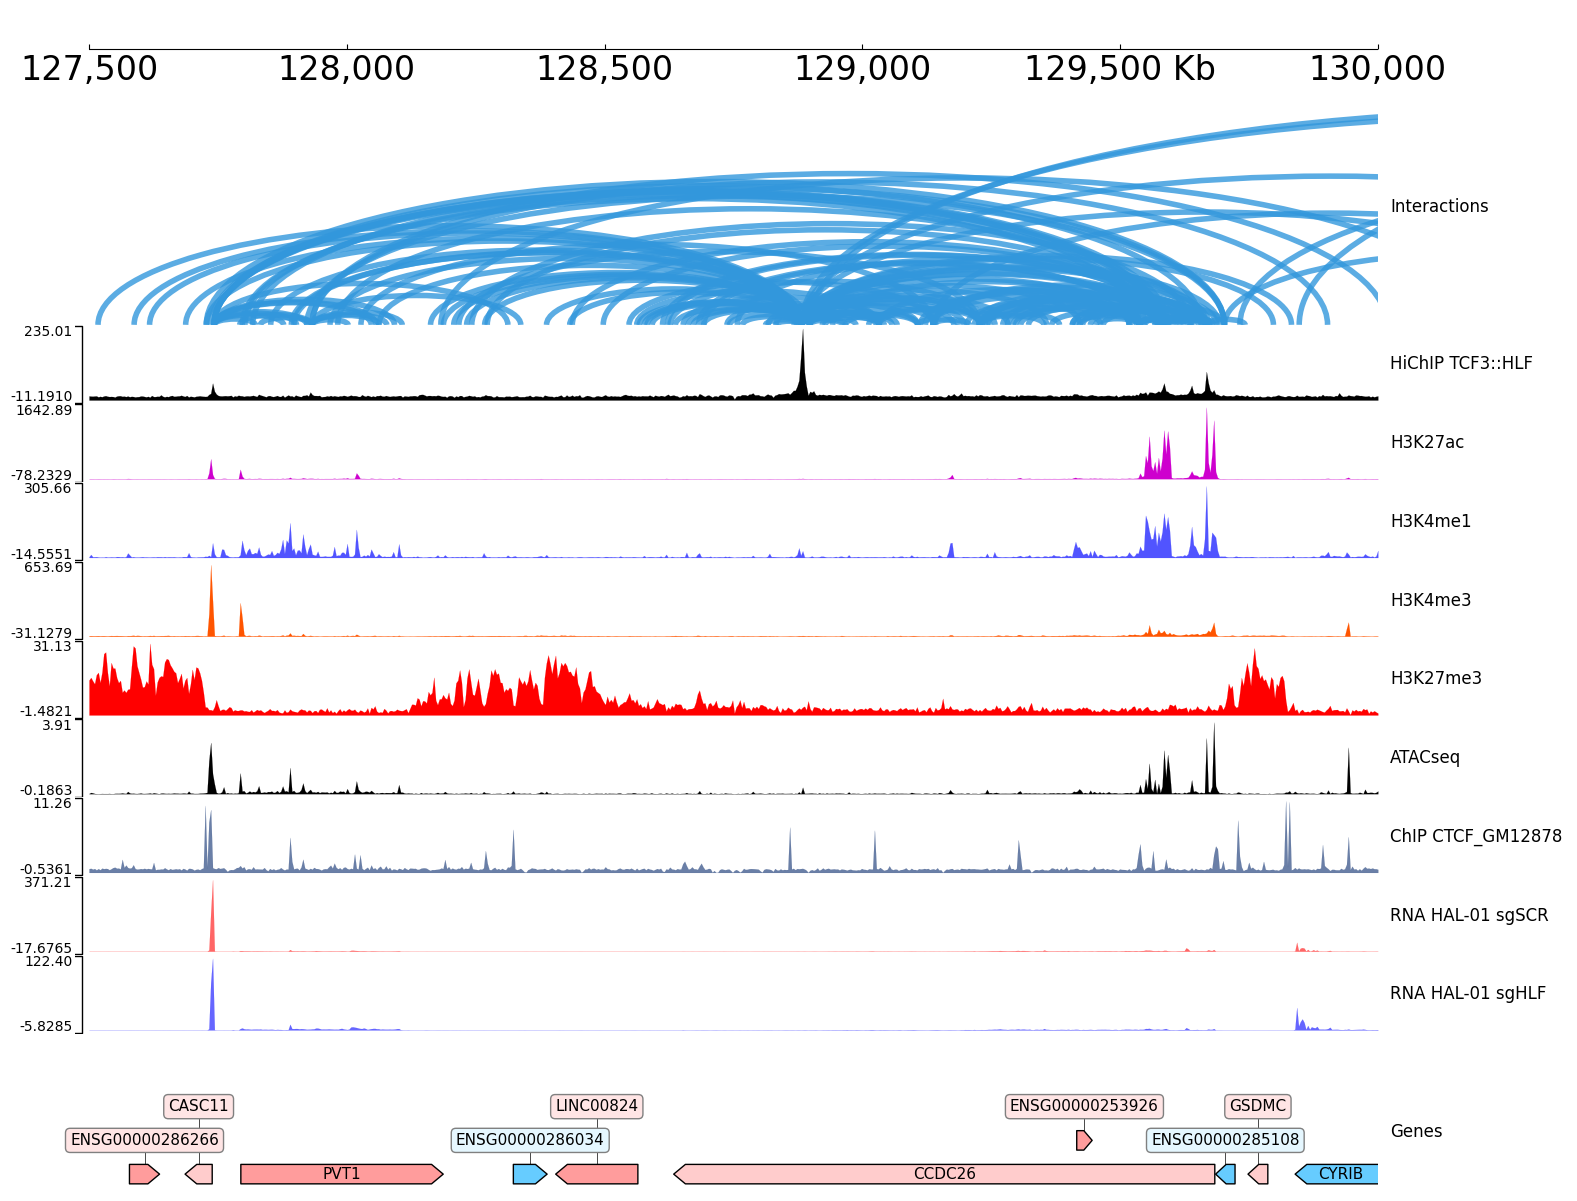

In [13]:
#Plot showing HiChIP output with interaction loops and tracks for integrated data.
chr_range = "chr8:127500000-130000000" #MYC enhancer-promoter locus, change coordinates for desired region
frame = \
    Arcs(arcs1, open_region=True, line_width=4, color="#3297dc") + \
    TrackHeight(6) + Title("Interactions") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    BigWig(bw2, alpha=1, color="#ce00ce") + \
    Title("H3K27ac") + \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
   BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq") + \
    BigWig(bwChipCTCF1, alpha=0.6, color="#072A6C") + \
    Title("ChIP CTCF_GM12878 ") + \
    BigWig(bw6, alpha=0.6, color="red") + \
    Title("RNA HAL-01 sgSCR") + \
    BigWig(bw8, alpha=0.6, color="blue") + \
    Title("RNA HAL-01 sgHLF")
frame += Spacer(1) + GTF(gtf40v, row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

In [14]:
#Command to open an interactive browse window starting at selected location
bsr = Browser(frame)
bsr.goto(chr_range)
bsr.show()

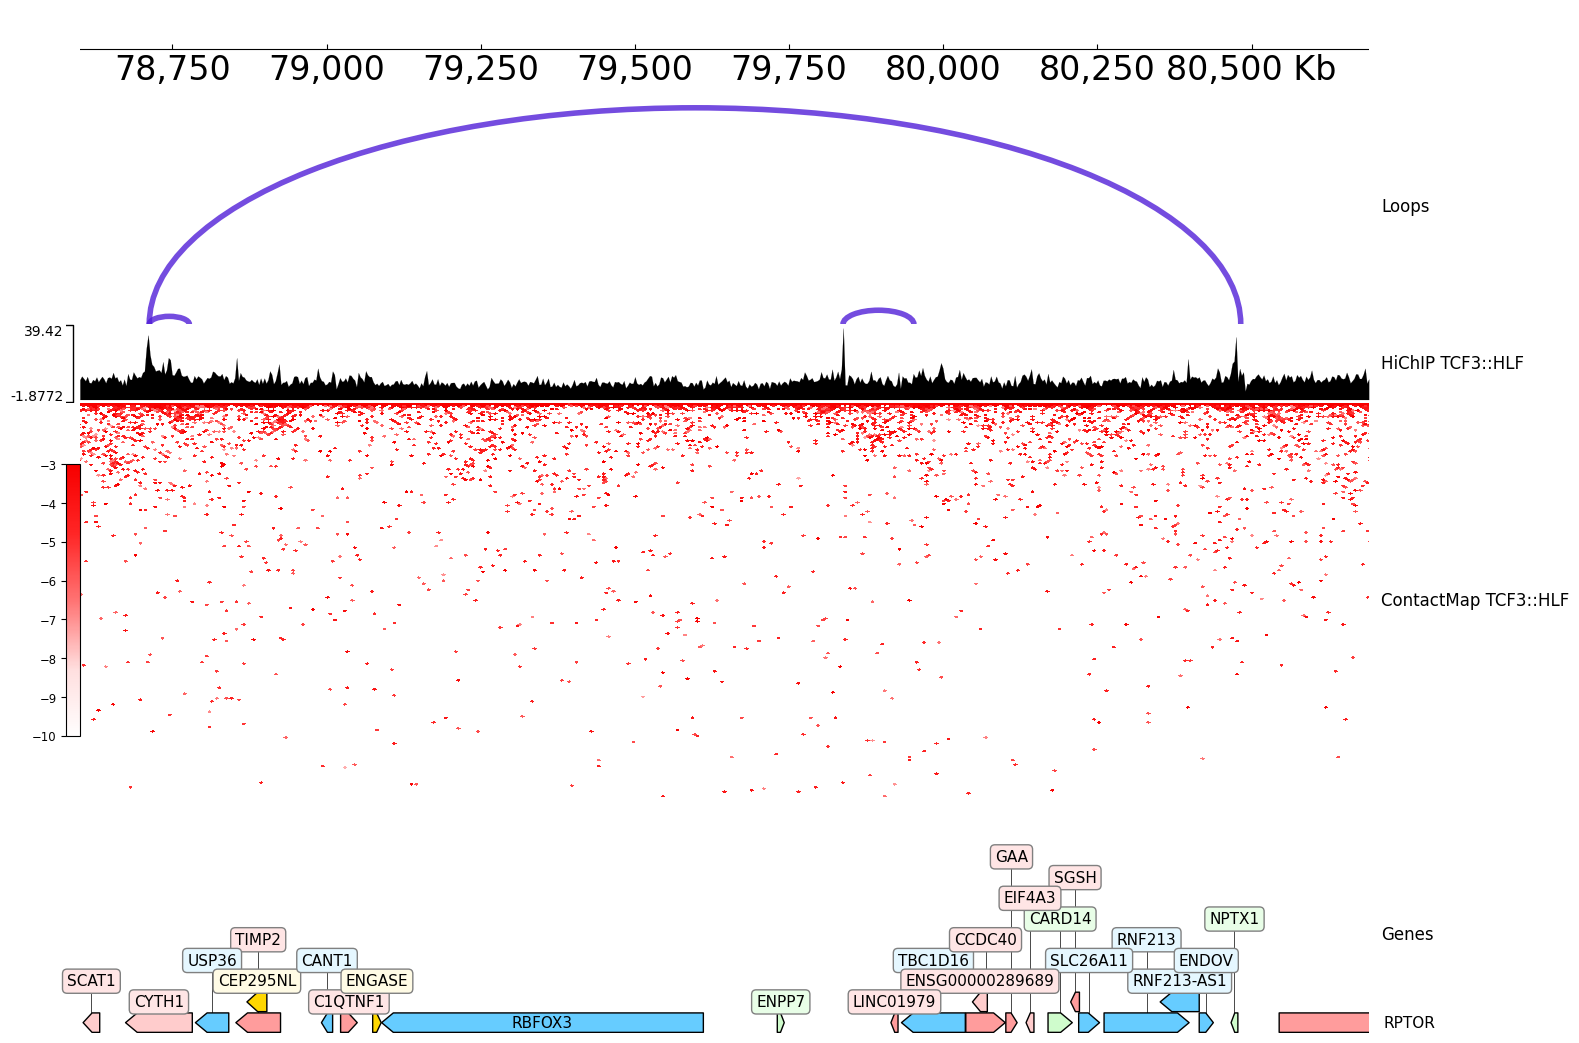

In [15]:
#Figure 3G. Representative region for showing weak and strong interactions.
chr_range = "chr17:78600000-80690000" #NPTX1 sumCC=12
frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF")
frame += Spacer(1) + GTF(gtf40v, row_height=1.0, name_attr="gene_name") + TrackHeight(5) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

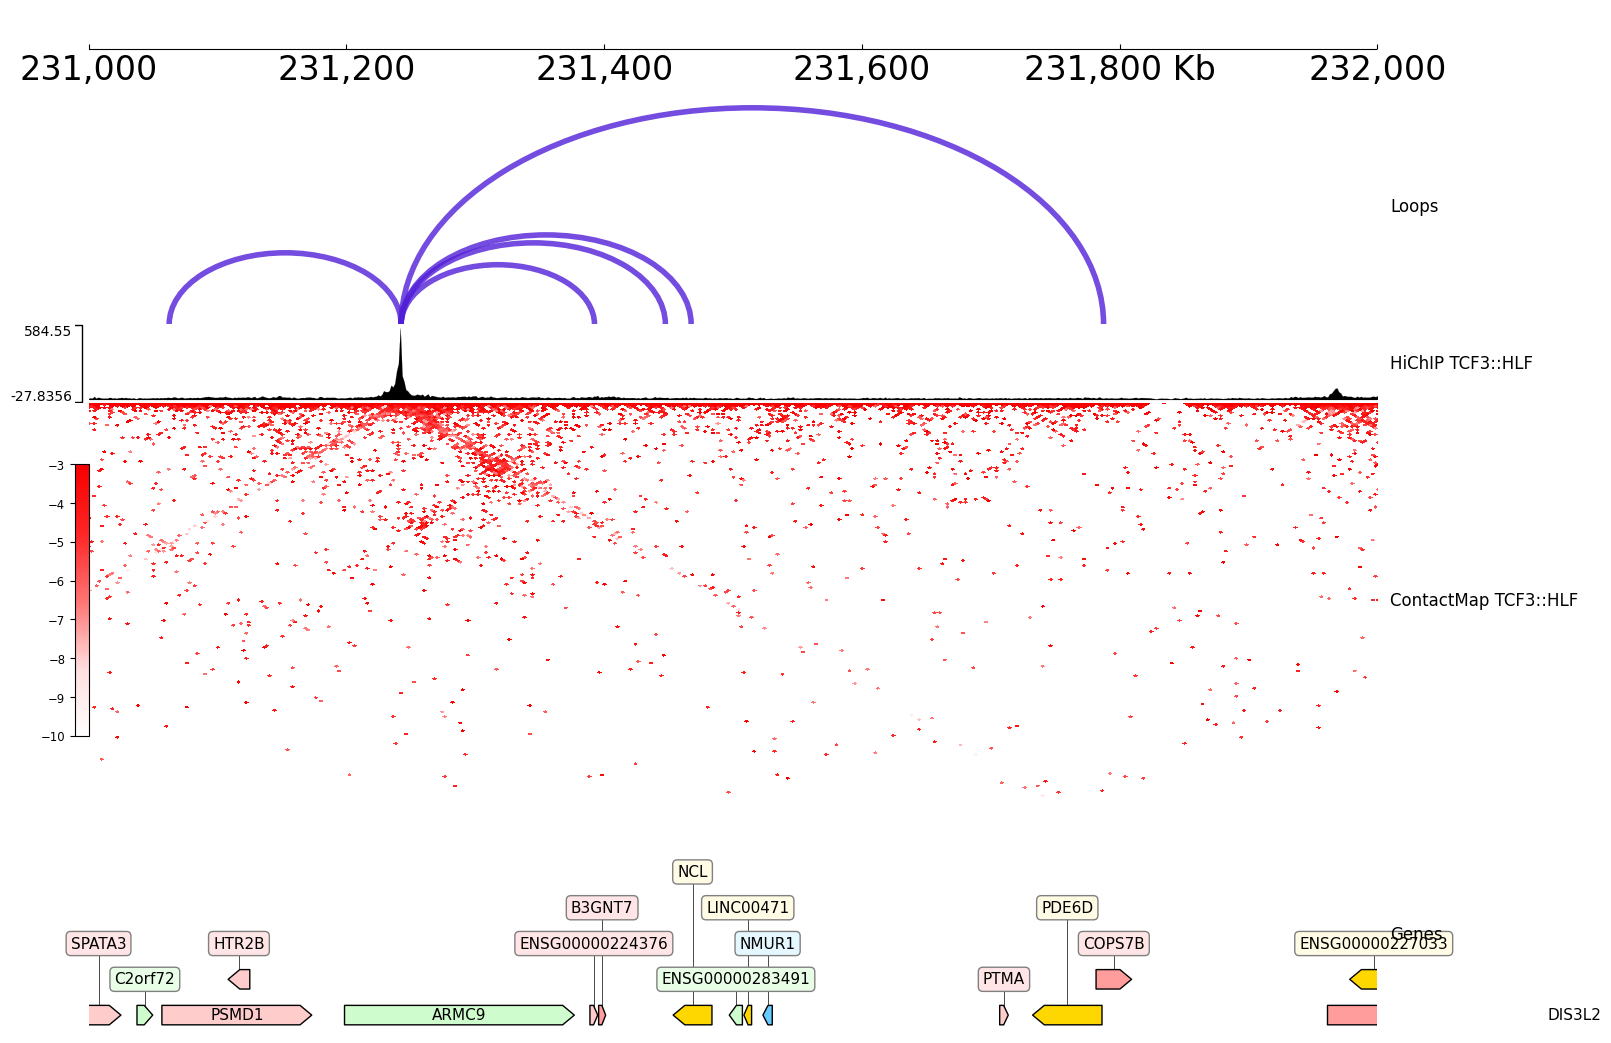

In [16]:
#Figure 3G. Representative region for showing weak and strong interactions.
chr_range = "chr2:231000000-232000000" #B3GNT7 sumCC=1646
frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF")
frame += Spacer(1) + GTF(gtf40v, row_height=1.0, name_attr="gene_name") + TrackHeight(5) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

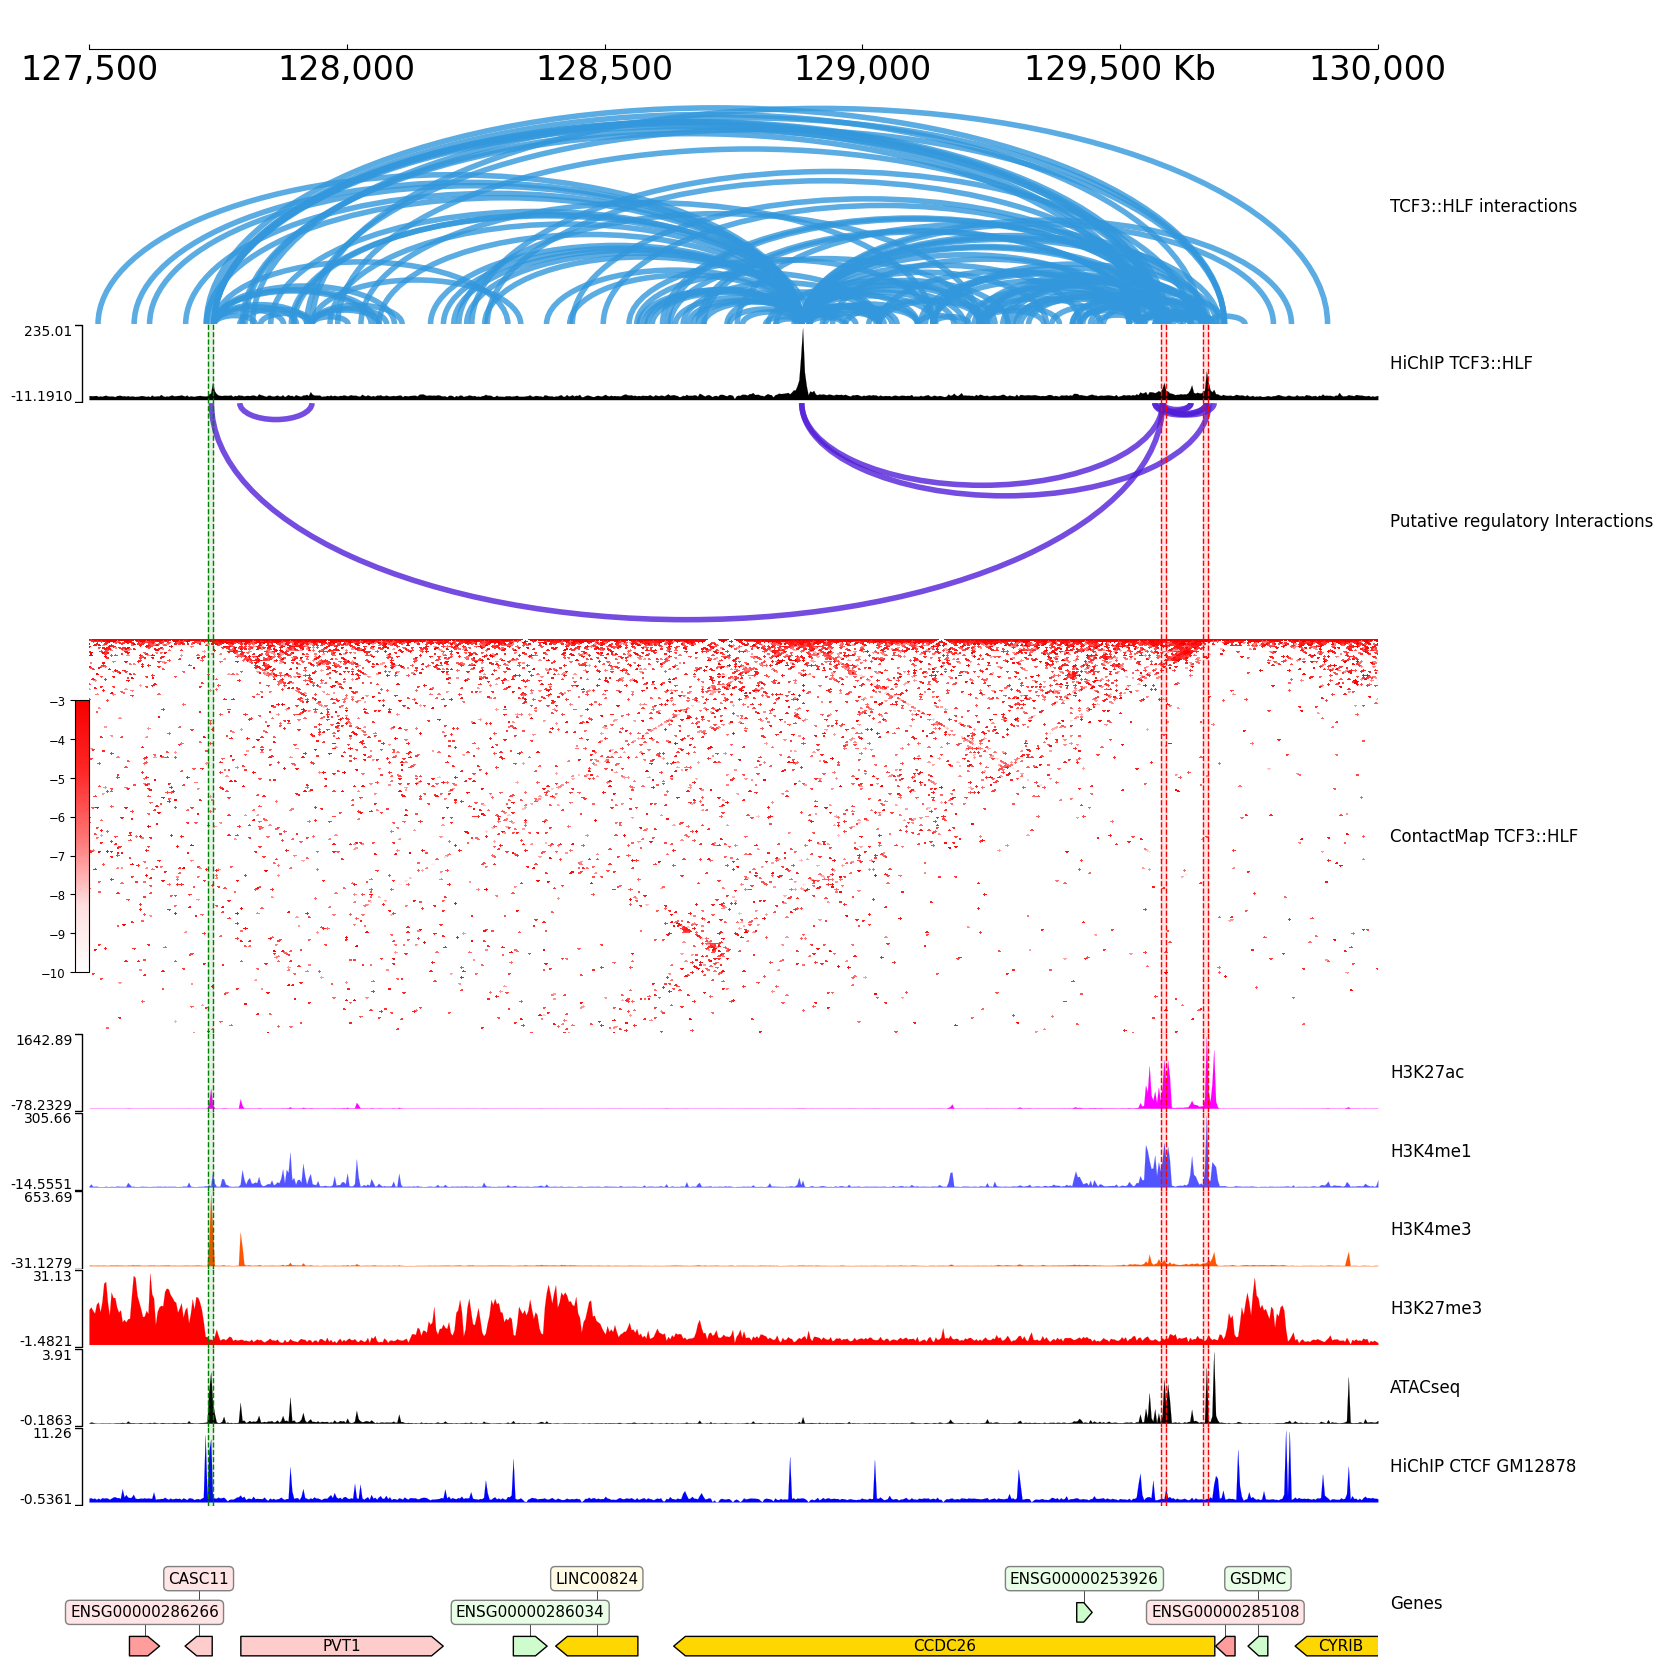

In [17]:
#Figure 4A. MYC enhancer-promoter locus full overview.
chr_range = "chr8:127500000-130000000" # Myc enhancer-promoter locus
regions_P= ["chr8:127730000-127740000"] # promoter site
regions_E= ["chr8:129580000-129590000", "chr8:129660000-129670000"] # enhancer site

#Setup for highlightiing selected regions P and E
highlight_P = HighLights(regions_P, color="green", alpha=0.1, border_line=True, border_line_style="dashed", border_line_color="green", border_line_width=1.0, border_line_alpha=1.0)
highlight_E = HighLights(regions_E, color="red", alpha=0.1, border_line=True, border_line_style="dashed", border_line_color="red", border_line_width=1.0, border_line_alpha=1.0)

frame = Arcs(arcs1, open_region=False, line_width=4, color="#3297dc") + \
    TrackHeight(6) + Title("TCF3::HLF interactions") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    highlight_P + highlight_E +  \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8", orientation='inverted') + \
    TrackHeight(6) + Title("Putative regulatory Interactions") + \
    highlight_P + highlight_E +  \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF") + \
    highlight_P + highlight_E +  \
    BigWig(bw2, alpha=1, color="#ff00ff") + \
    Title("H3K27ac") + \
    highlight_P + highlight_E +  \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    highlight_P + highlight_E +  \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
    highlight_P + highlight_E +  \
    BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    highlight_P + highlight_E +  \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq") + \
    highlight_P + highlight_E +  \
    BigWig(bwChipCTCF1, alpha=1, color="blue") + \
    highlight_P + highlight_E + \
    Title("HiChIP CTCF GM12878 ")
frame += Spacer(1) + GTF(gtf40v , row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

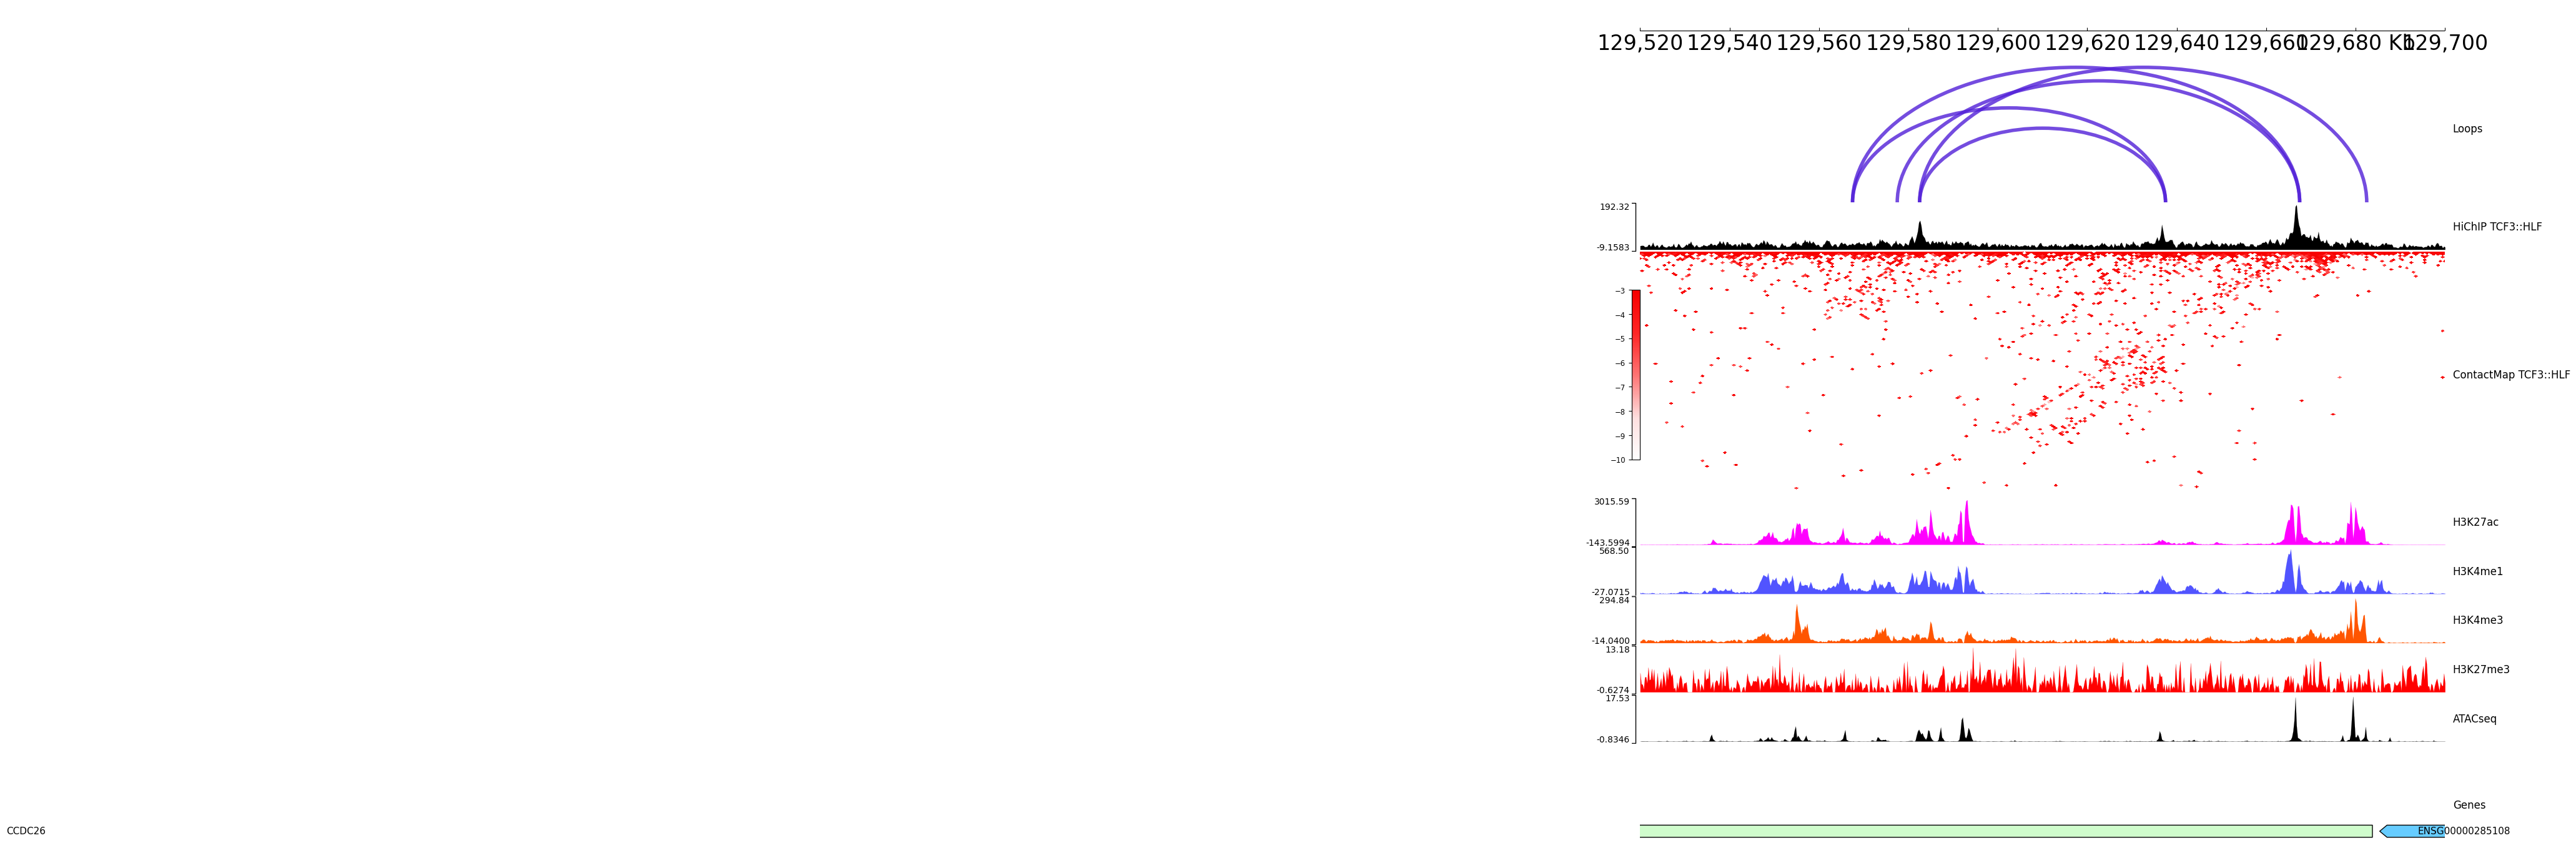

In [18]:
#Figure 4B. MYC enhancers SE1 SE2 locus close-up.
chr_range = "chr8:129520000-129700000" #MYC SE1 SE2 enhancer site
frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF") + \
    BigWig(bw2, alpha=1, color="#ff00ff") + \
    Title("H3K27ac") + \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
    BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq")
frame += Spacer(1) + GTF(gtf40v, gene_type="transcrip", row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

[W::hts_idx_load3] The index file is older than the data file: /home/valdipnet/JupyterLab/GRCh38.ncbiRefSeqSelect.bed.bgz.tbi


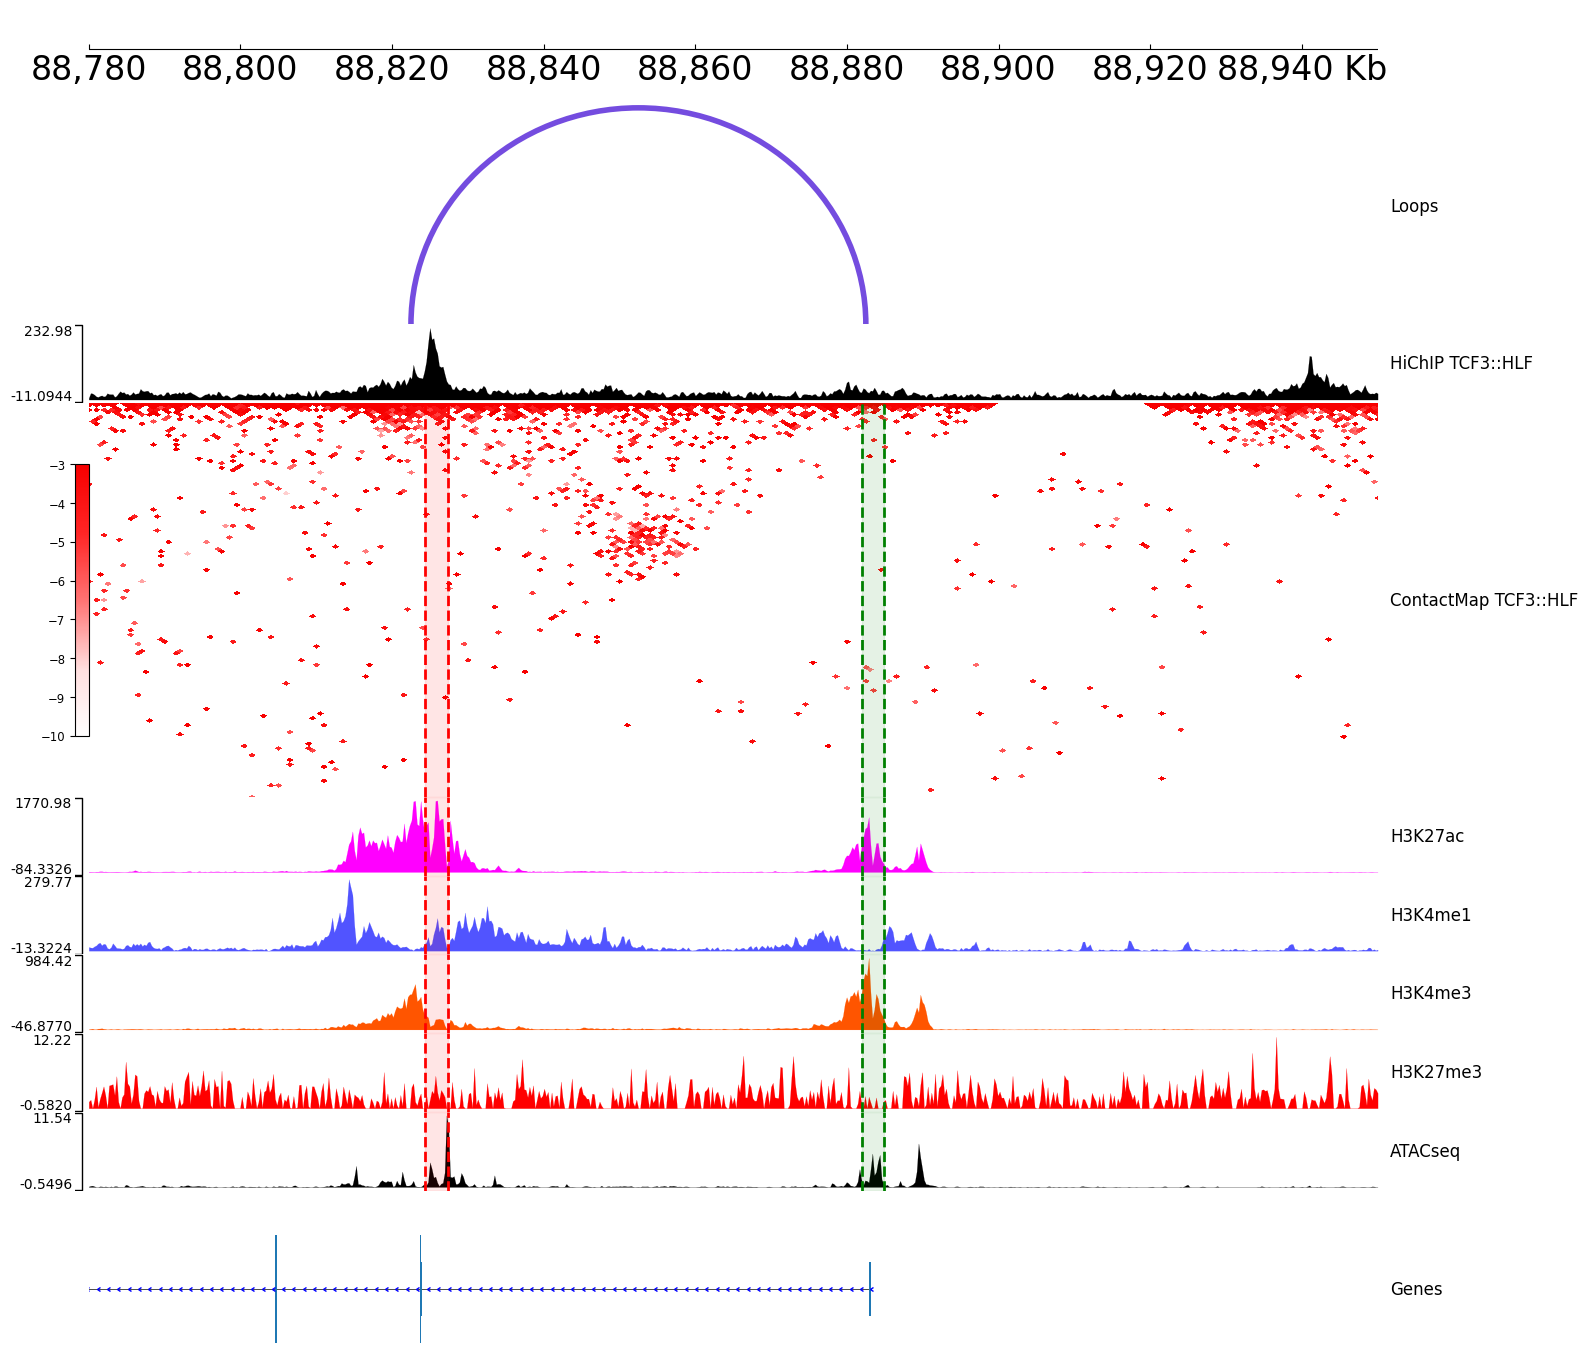

In [19]:
#Figure 5A. MEF2C locus for TCF3::HLF mediated enhancer-promoter loop.
chr_range = "chr5:88780000-88950000" # MEF2C 
regions_P= ["chr5:88882000-88884900"] # promoter site
regions_E= ["chr5:88824291-88827329"] # enhancer site

#Setup for highlightiing selected regions P and E
highlight_P = HighLights(regions_P, color="green", alpha=0.1, border_line=True, border_line_style="dashed", border_line_color="green", border_line_width=2.0, border_line_alpha=1.0)
highlight_E = HighLights(regions_E, color="red", alpha=0.1, border_line=True, border_line_style="dashed", border_line_color="red", border_line_width=2.0, border_line_alpha=1.0)

frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF") + \
    highlight_P + highlight_E +  \
    BigWig(bw2, alpha=1, color="#ff00ff") + \
    Title("H3K27ac") + \
    highlight_P + highlight_E +  \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    highlight_P + highlight_E +  \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
    highlight_P + highlight_E +  \
    BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    highlight_P + highlight_E +  \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq") + \
    highlight_P + highlight_E
frame += Spacer(1) + BED(BEDTrack, gene_style='normal', display='collapsed', height = 5, row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

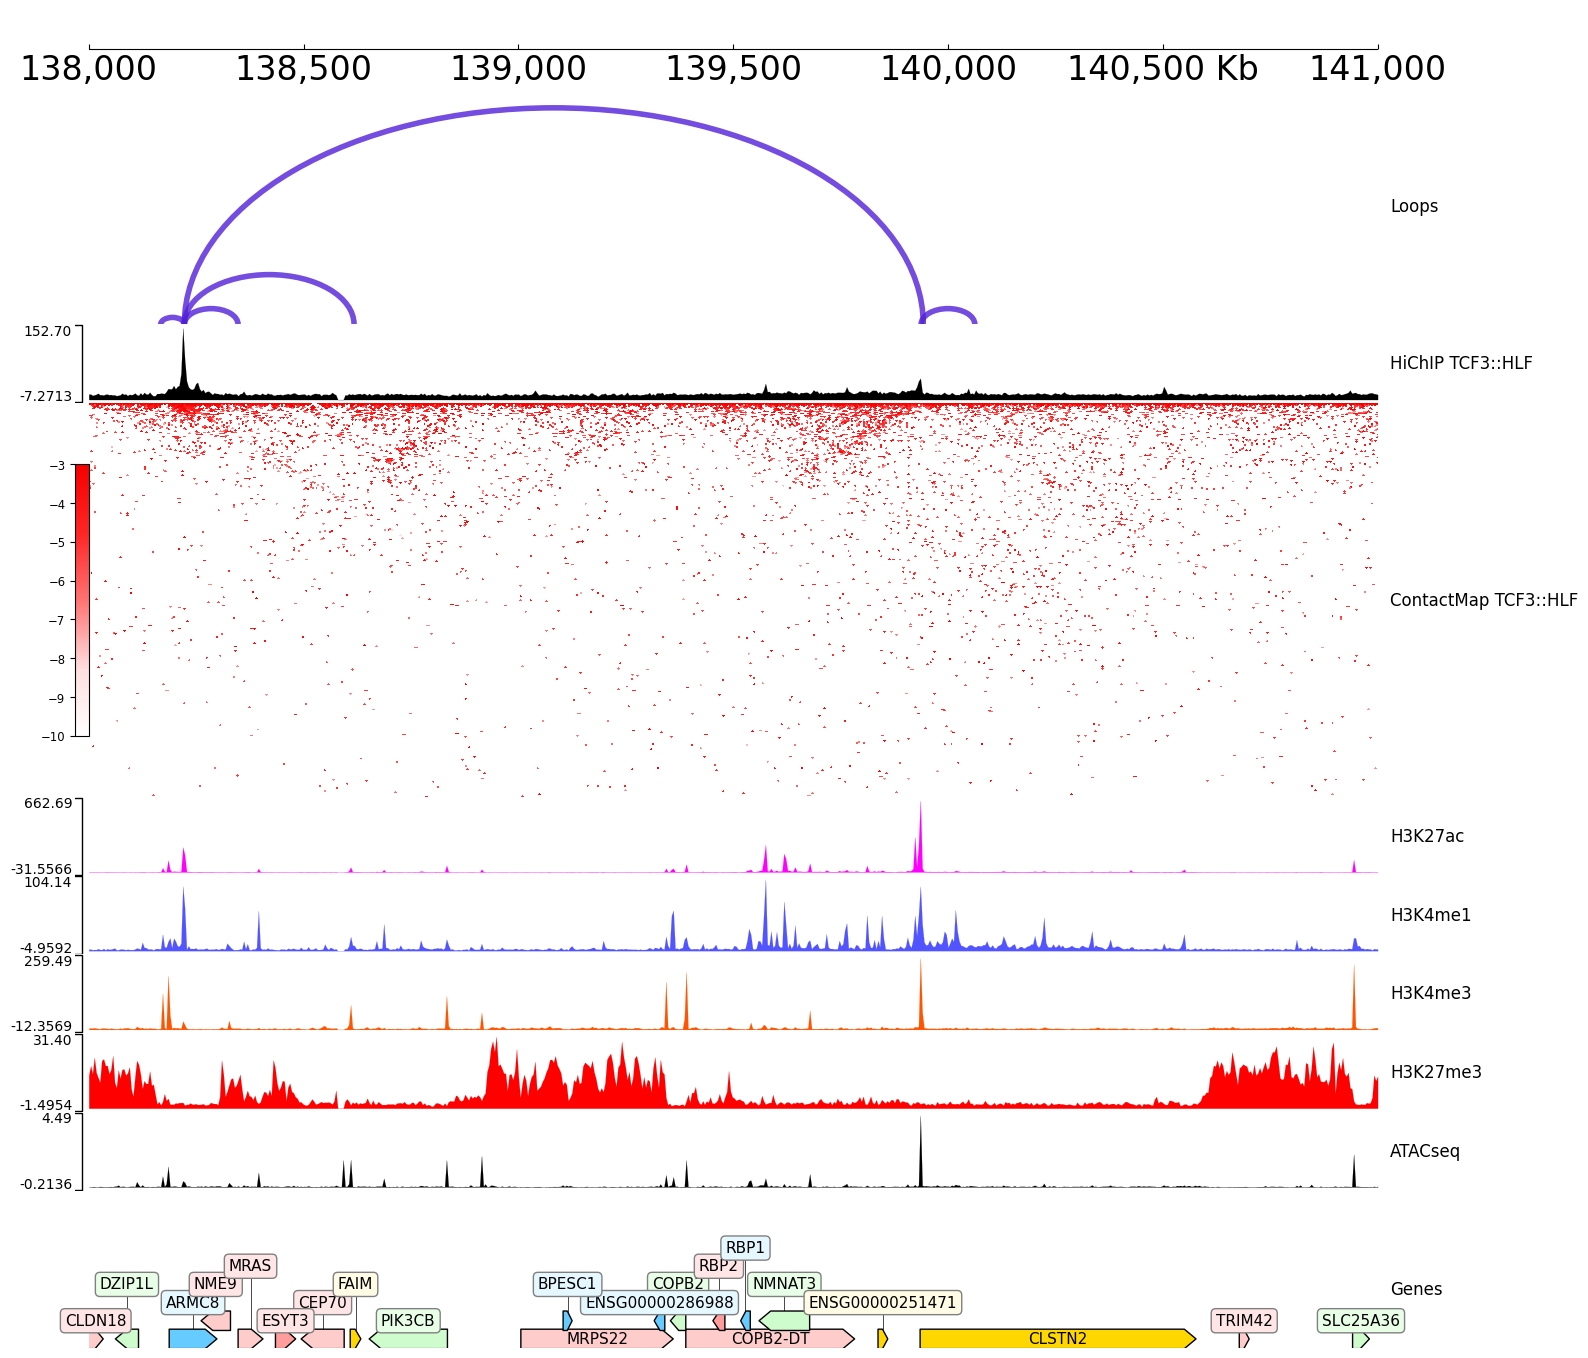

In [20]:
#Figure Suppl. 3A. Locus for TCF3::HLF mediated enhancer-promoter loop. 
chr_range = "chr3:138000000-141000000" #CLSTN2
frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF") + \
    BigWig(bw2, alpha=1, color="#ff00ff") + \
    Title("H3K27ac") + \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
    BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq")
frame += Spacer(1) + GTF(gtf40v, gene_type="transcrip", row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)

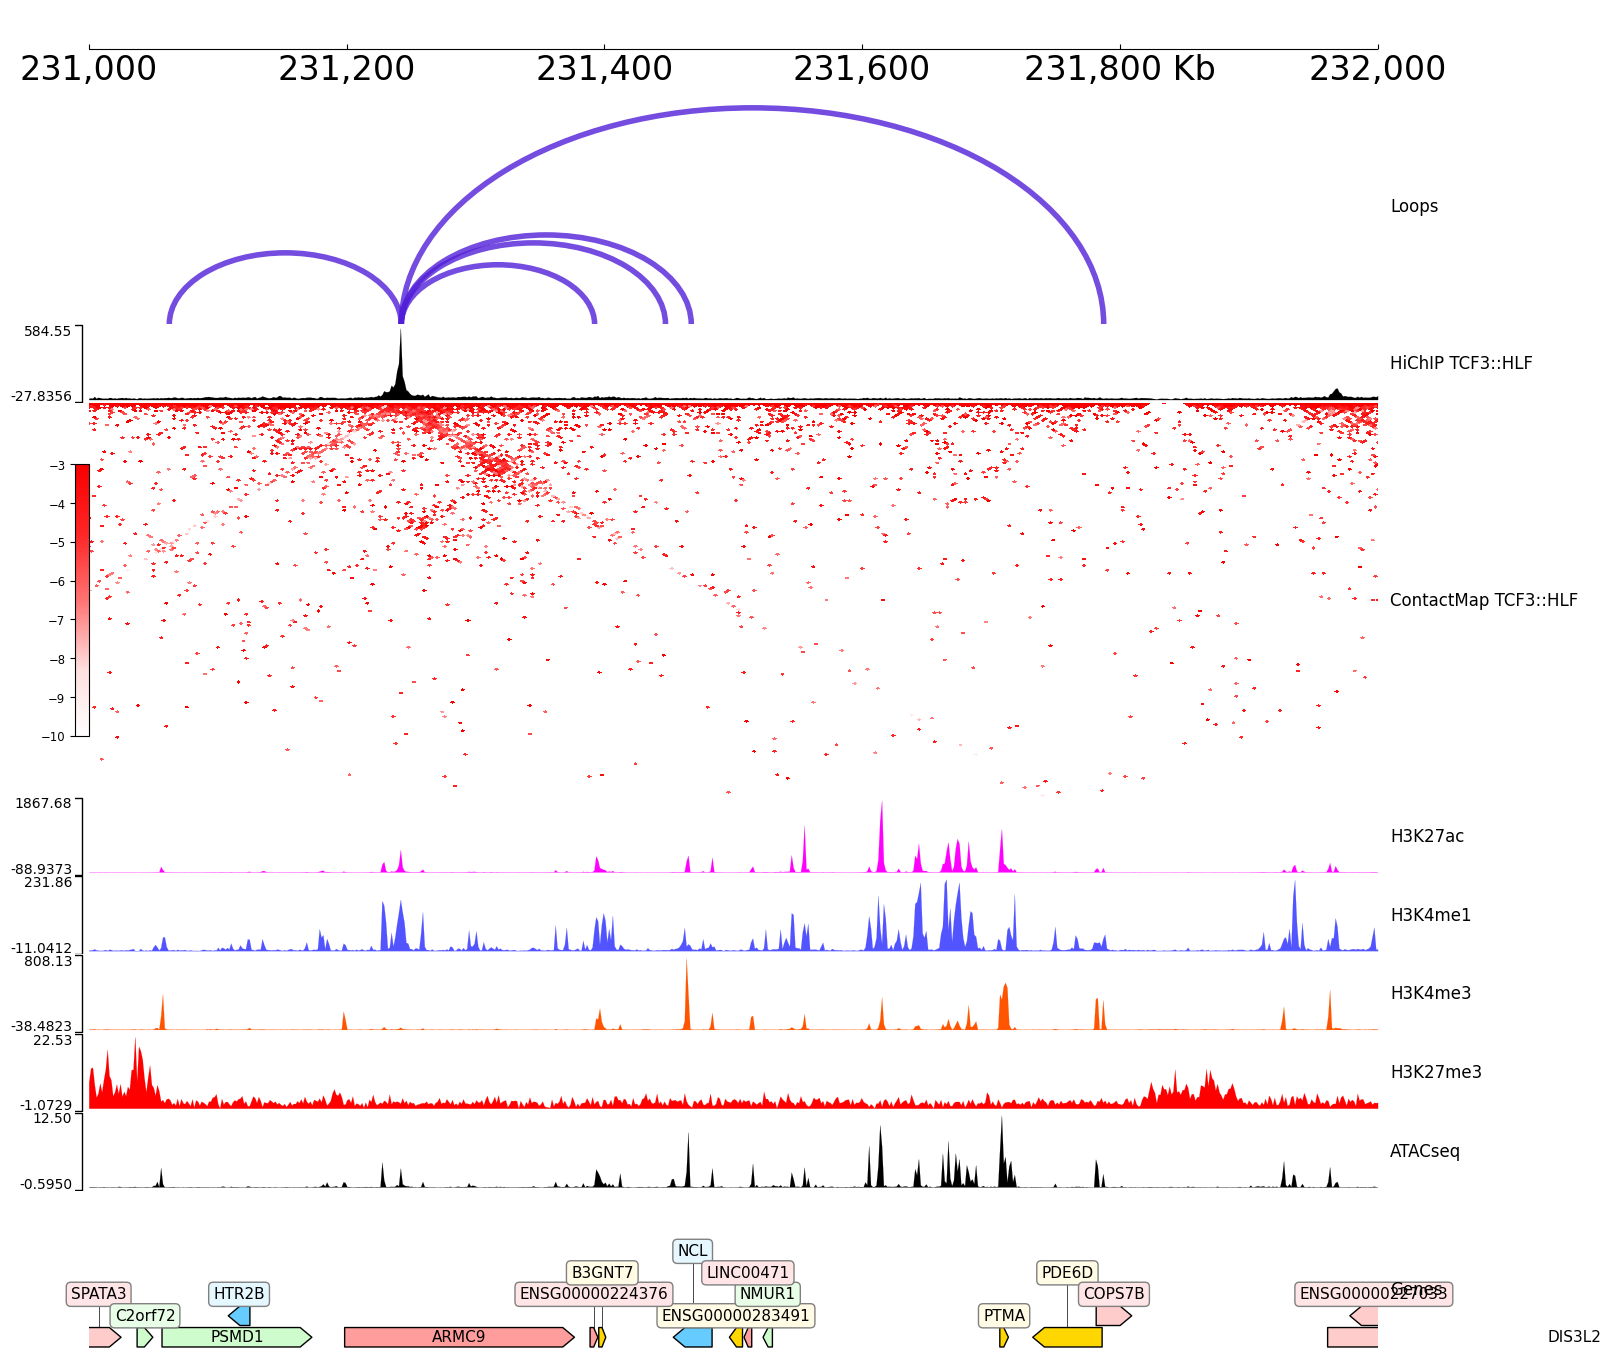

In [21]:
#Figure Suppl. 3C. Locus for TCF3::HLF mediated enhancer-promoter loop.
chr_range = "chr2:231000000-232000000" #B3GNT7
frame = \
    Arcs(arcsLoops, open_region=False, line_width=4, color="#511FD8") + \
    TrackHeight(6) + Title("Loops") + \
    BigWig(bw1, alpha=1, color="#000000") + \
    Title("HiChIP TCF3::HLF") + \
    Cool(CMap, cmap="JuiceBoxLike", max_value=-3 , min_value=-10) + Inverted() + TrackHeight(10) + \
    Title("ContactMap TCF3::HLF") + \
    BigWig(bw2, alpha=1, color="#ff00ff") + \
    Title("H3K27ac") + \
    BigWig(bw3, alpha=1, color="#5154ff") + \
    Title("H3K4me1") + \
    BigWig(bw4, alpha=1, color="#ff5500") + \
    Title("H3K4me3") + \
    BigWig(bw5, alpha=1, color="#ff0000") + \
    Title("H3K27me3") + \
    BigWig(bwATAC_HAL01, alpha=1, color="#000000") + \
    Title("ATACseq")
frame += Spacer(1) + GTF(gtf40v, gene_type="transcrip", row_height=1.0) + TrackHeight(3) + Title("Genes")
frame = XAxis(fontsize=24) + frame
frame.plot(chr_range)